ETR 

In [18]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [19]:
df = pd.read_csv('DATA/incident_event_log.csv')

In [20]:
df 

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,true,0,0,0,true,Caller 2403,Opened by 8,29/2/2016 01:16,...,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,true,0,0,2,true,Caller 2403,Opened by 8,29/2/2016 01:16,...,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,true,0,0,3,true,Caller 2403,Opened by 8,29/2/2016 01:16,...,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,false,0,0,4,true,Caller 2403,Opened by 8,29/2/2016 01:16,...,false,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,true,0,0,0,true,Caller 2403,Opened by 397,29/2/2016 04:40,...,false,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119993,INC0029231,Resolved,true,0,0,8,true,Caller 2321,Opened by 17,13/5/2016 11:46,...,true,Do Not Notify,?,?,?,?,code 7,Resolved by 11,13/5/2016 12:15,18/5/2016 13:07
119994,INC0029231,Closed,false,0,0,9,true,Caller 2321,Opened by 17,13/5/2016 11:46,...,true,Do Not Notify,?,?,?,?,code 7,Resolved by 11,13/5/2016 12:15,18/5/2016 13:07
119995,INC0029232,Resolved,true,0,0,0,true,Caller 382,Opened by 108,13/5/2016 11:48,...,false,Do Not Notify,?,?,?,?,code 6,Resolved by 52,?,18/5/2016 12:07
119996,INC0029232,Closed,false,0,0,1,true,Caller 382,Opened by 108,13/5/2016 11:48,...,false,Do Not Notify,?,?,?,?,code 6,Resolved by 52,?,18/5/2016 12:07


In [21]:
df.describe
df.info 

<bound method DataFrame.info of         number       incident_state       active   reassignment_count   \
0       INC0000045   New                  true                       0   
1       INC0000045   Resolved             true                       0   
2       INC0000045   Resolved             true                       0   
3       INC0000045   Closed               false                      0   
4       INC0000047   New                  true                       0   
...             ...                  ...      ...                  ...   
119993  INC0029231   Resolved             true                       0   
119994  INC0029231   Closed               false                      0   
119995  INC0029232   Resolved             true                       0   
119996  INC0029232   Closed               false                      0   
119997  INC0029233   New                  true                       0   

        reopen_count   sys_mod_count   made_sla   caller_id     \
0            

<Axes: >

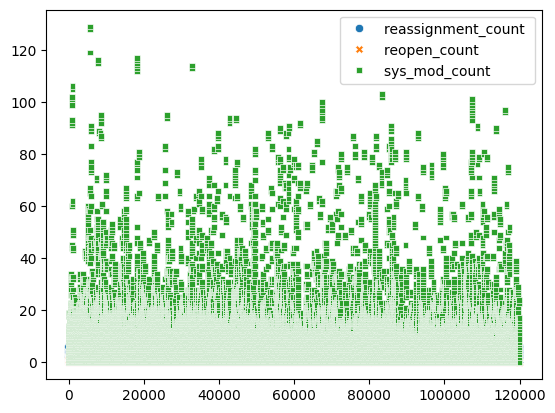

In [22]:

sns.scatterplot(df)

In [23]:
df.columns

Index(['number     ', 'incident_state     ', 'active ', 'reassignment_count ',
       'reopen_count ', 'sys_mod_count ', 'made_sla ', 'caller_id   ',
       'opened_by      ', 'opened_at       ', 'sys_created_by ',
       'sys_created_at  ', 'sys_updated_by ', 'sys_updated_at   ',
       'contact_type ', 'location     ', 'category    ', 'subcategory     ',
       'u_symptom   ', 'cmdb_ci    ', 'impact     ', 'urgency    ',
       'priority     ', 'assignment_group ', 'assigned_to  ', 'knowledge ',
       'u_priority_confirmation ', 'notify        ', 'problem_id      ',
       'rfc        ', 'vendor   ', 'caused_by  ', 'closed_code ',
       'resolved_by     ', 'resolved_at      ', 'closed_at'],
      dtype='object')

In [24]:
# replaces 
df.replace('?', np.nan, inplace=True)
print(df.isnull().sum())


number                      0
incident_state              0
active                      0
reassignment_count          0
reopen_count                0
sys_mod_count               0
made_sla                    0
caller_id                   0
opened_by                   0
opened_at                   0
sys_created_by              0
sys_created_at              0
sys_updated_by              0
sys_updated_at              0
contact_type                0
location                    0
category                    0
subcategory                 0
u_symptom                   0
cmdb_ci                     0
impact                      0
urgency                     0
priority                    0
assignment_group            0
assigned_to                 0
knowledge                   0
u_priority_confirmation     0
notify                      0
problem_id                  0
rfc                         0
vendor                      0
caused_by                   0
closed_code                 0
resolved_b

In [25]:
# drop problems that havent been resloved 
# df = df.dropna(subset=["resolved_at", "closed_at"])

In [28]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Convert date columns to datetime with error handling
date_columns = ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col].str.strip(), format='%d/%m/%Y %H:%M', errors='coerce')

# Verify the changes
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   119998 non-null  object        
 1   incident_state           119998 non-null  object        
 2   active                   119998 non-null  object        
 3   reassignment_count       119998 non-null  int64         
 4   reopen_count             119998 non-null  int64         
 5   sys_mod_count            119998 non-null  int64         
 6   made_sla                 119998 non-null  object        
 7   caller_id                119998 non-null  object        
 8   opened_by                119998 non-null  object        
 9   opened_at                119998 non-null  datetime64[ns]
 10  sys_created_by           119998 non-null  object        
 11  sys_created_at           77644 non-null   datetime64[ns]
 12  sys_updated_by  

In [29]:
binary_columns = [col for col in df.columns if df[col].nunique() == 2]

# Print the list of binary columns
print("Binary columns:", binary_columns)

Binary columns: ['active', 'made_sla', 'contact_type', 'knowledge', 'u_priority_confirmation', 'notify']


In [30]:
# Convert specific columns to boolean type
columns_to_boolean = ['active', 'made_sla', 'u_priority_confirmation', 'knowledge']

# Convert the selected columns
for col in columns_to_boolean:
    df[col] = df[col].astype(bool)

# Verify the changes
print(df[columns_to_boolean].dtypes)
print(df.head())

active                     bool
made_sla                   bool
u_priority_confirmation    bool
knowledge                  bool
dtype: object
        number       incident_state  active  reassignment_count  reopen_count  \
0  INC0000045   New                    True                   0             0   
1  INC0000045   Resolved               True                   0             0   
2  INC0000045   Resolved               True                   0             0   
3  INC0000045   Closed                 True                   0             0   
4  INC0000047   New                    True                   0             0   

   sys_mod_count  made_sla     caller_id        opened_by           opened_at  \
0              0      True  Caller 2403   Opened by  8    2016-02-29 01:16:00   
1              2      True  Caller 2403   Opened by  8    2016-02-29 01:16:00   
2              3      True  Caller 2403   Opened by  8    2016-02-29 01:16:00   
3              4      True  Caller 2403   Opene

In [31]:
for column in df.columns:
    unique_values = df[column].unique()
    num_unique_values = len(unique_values)
    
    if num_unique_values <= 30:
        print(f"Column '{column}' has {num_unique_values} unique values:")
        print(unique_values)
    else:
        print(f"Column '{column}' has {num_unique_values} unique values, which is more than 15. Not displaying values.")
    
    print('-' * 40)

Column 'number' has 20769 unique values, which is more than 15. Not displaying values.
----------------------------------------
Column 'incident_state' has 9 unique values:
['New                ' 'Resolved           ' 'Closed             '
 'Active             ' 'Awaiting User Info ' 'Awaiting Problem   '
 'Awaiting Vendor    ' 'Awaiting Evidence  ' '-100               ']
----------------------------------------
Column 'active' has 1 unique values:
[ True]
----------------------------------------
Column 'reassignment_count' has 28 unique values:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
----------------------------------------
Column 'reopen_count' has 9 unique values:
[0 1 2 3 4 5 6 7 8]
----------------------------------------
Column 'sys_mod_count' has 115 unique values, which is more than 15. Not displaying values.
----------------------------------------
Column 'made_sla' has 1 unique values:
[ True]
------------------------------------

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   119998 non-null  object        
 1   incident_state           119998 non-null  object        
 2   active                   119998 non-null  bool          
 3   reassignment_count       119998 non-null  int64         
 4   reopen_count             119998 non-null  int64         
 5   sys_mod_count            119998 non-null  int64         
 6   made_sla                 119998 non-null  bool          
 7   caller_id                119998 non-null  object        
 8   opened_by                119998 non-null  object        
 9   opened_at                119998 non-null  datetime64[ns]
 10  sys_created_by           119998 non-null  object        
 11  sys_created_at           77644 non-null   datetime64[ns]
 12  sys_updated_by  